# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [ ]:
### Guideline for convenience ###
# 압축 풀기
import os                           
import zipfile
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/[0823] CNN/animals10.zip" -d "/content"

In [ ]:
class Img_Dataset(torch.utils.data.Dataset):

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        return img_transformed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [ ]:
from torchvision import datasets, models, transforms

transform = transforms.Resize((300, 300))
    
image_datasets = datasets.ImageFolder('/content/Animals-10',transform)

print(image_datasets)

class_names = image_datasets.classes 

Dataset ImageFolder
    Number of datapoints: 26179
    Root location: /content/Animals-10
    StandardTransform
Transform: Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)


In [22]:
from torch.utils.data.sampler import SubsetRandomSampler
import torch

data_dir = '/content/Animals-10'

def create_datasets(batch_size):
    
    train_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomCrop(256),             
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),         
    transforms.ToTensor(),  # 알맞게 변경하세요 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  #  정규화(normalization)
    ])
    test_transform = transforms.Compose([   # 나중에 test 데이터 불러올 때 참고하세요. 
    transforms.Resize((256, 256)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  
    ])
    # choose the training and test datasets
    train_dataset = datasets.ImageFolder(os.path.join('/content', 'Animals-10'), train_transform)


    # trainning set 중 validation 데이터로 사용할 비율
    valid_size = 0.3

    # validation으로 사용할 trainning indices를 얻는다.
    num_train = len(train_dataset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # trainning, validation batch를 얻기 위한 sampler정의
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=4)

    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=4)

    return train_dataset, train_loader, valid_loader

train_dataset, train_loader, valid_loader = create_datasets(batch_size=32)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
train_size = int(0.7 * len(image_datasets))

test_size = len(image_datasets) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(image_datasets, [train_size, test_size])

train_transforms = transforms.Compose([                 
    transforms.RandomCrop(256),             
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),         
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

test_transforms = transforms.Compose([
    transforms.ToTensor()
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

train_dataset = train_transforms(train_dataset)

test_dataset = test_transforms(test_dataset)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32,shuffle = True)

val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32,shuffle = False)



TypeError: ignored

In [ ]:
current_path = os.getcwd()

print("현재 위치 : " + current_path)


현재 위치 : /content


In [ ]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?
Animal_list = ['butterlfly','cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']

In [23]:
# test에 넣을 이미지 개수 계산
print(train_dataset)


Dataset ImageFolder
    Number of datapoints: 26179
    Root location: /content/Animals-10
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               RandomCrop(size=(256, 256), padding=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )


In [ ]:
len(train_loader)


573

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [ ]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
tmploader_cifar = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle=False)
dataiter = iter(tmploader_cifar)
images, labels = dataiter.next()

TypeError: ignored

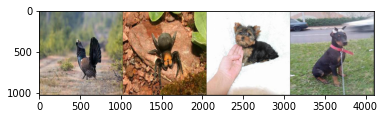

chicken spider dog   dog  


In [ ]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
images.shape
labels.shape
def imshow_loader(img):
    
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()
Animal_list = ['butterlfly','cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{Animal_list[labels[j]]:5s}' for j in range(4)))

In [ ]:
# train, test에 대해 DataLoader 정의
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):
    
    def __init__(self):
        super(MyModel, self).__init__()
        #첫번째 layer 생성
        self.layer1 = nn.Sequential(
    
            nn.Conv2d(3, 32, kernel_size = 3, stride =1, padding = 1),
            #ReLU함수에 통과시킨다.
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        #두 번째 layer 생성, 이번에는 output filter이 64개이다.
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride =1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        #fully connected layer 생성
        self.fc = nn.Linear(64 * 64 * 64,10)
        nn.init.xavier_uniform_(self.fc.weight)
  

   #모델 설계 후 데이터셋이 layer들을 통과할 수 있게 함.
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) #보충설명2
        out = self.fc(out)
        return out

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
from torchsummary import summary
test_model = MyModel() # 모델 객체 선언

summary(test_model,(3,256,256), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

RuntimeError: ignored

In [ ]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=262144, out_features=10, bias=True)
)

In [ ]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001)

In [ ]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 256, 256])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.3466217517852783
tensor([8, 1, 5, 5, 1, 5, 1, 5, 1, 1, 5, 1, 5, 1, 4, 1, 1, 5, 9, 4, 4, 5, 1, 5,
        5, 1, 5, 1, 1, 5, 1, 1], device='cuda:0')
tensor([8, 4, 0, 8, 1, 4, 7, 8, 2, 7, 8, 9, 4, 6, 5, 2, 2, 2, 2, 7, 8, 3, 1, 2,
        4, 4, 4, 8, 4, 2, 2, 1], device='cuda:0')
4


In [ ]:
conv1 = torch.nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1) #input channel, output channel, filter크기, padding
pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
conv2 = torch.nn.Conv2d(32, 64, 3, 1, padding =1)
inputs=torch.Tensor(1,3,256,256)
out = conv1(inputs)
out.size()
out = pool(out)
out = conv2(out)
out = pool(out)
out.size()

In [ ]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 32

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_cifar):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)



In [ ]:
# loss, accuracy 추이 확인 with plt.plot